 * Student name: Charles Ondieki Otwori
 * Student pace: Part-time
 * Scheduled project review date/time: March , 2025
 * Instructor name:
 * Github link 

# Predicting HIV Risk and Identifying Key Infection Drivers among Adolescent Girls and Young Women in Kenya (2018–2022)
## Business Understanding 
### Project Value: 
This project provides critical insights to combat the HIV epidemic among adolescent girls by analyzing five years of program data. Adolescent girls and young women (AGYW) face disproportionately high HIV risk  in sub-Saharan Africa, HIV prevalence in young women is over three times higher than in their male peers​ unaids.org. By understanding how HIV incidence has changed from 2018 to 2022 and what factors drive new infections, stakeholders can sharpen their strategies to protect this vulnerable group. The analysis will ensure resources (e.g. prevention programs, funding) are directed to where they have the greatest impact, ultimately moving closer to the goal of an AIDS-free generation of girls.

### Real-World Problem: 
The  Adolescent girls and young women(AGYW) HIV prevention program was launched to reduce new HIV infections in AGYW aged 15 to 25 years  who significantly account for new HIV cases. Globally, women and girls comprised 44% of new HIV infections in 2023 unaids.org .This project addresses the  high HIV incidence in adolescent girls by identifying why these infections occur (key risk factors) and who is most at risk (through predictive modeling). Solving this problem means fewer new HIV cases, which is essential for achieving epidemic control targets.

import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
data =pd.read_csv("\Capstone project\dreams_raw_dataset\dreams_raw_dataset.csv")
data.head(10)

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
5,6/30/2003,5/12/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
6,1/23/2005,5/11/2020,Nairobi,Mother,NaN,44.0,Don't Know,Yes,No,No,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
7,3/10/2005,5/15/2020,Nairobi,Mother,NaN,43.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
8,9/1/2004,5/14/2020,Nairobi,Mother,NaN,39.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
9,4/18/2003,3/2/2020,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN


In [6]:
data.tail(10)

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
455797,1/27/1998,1/10/2021,Kiambu,Father,NaN,56.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),1/10/2021,Negative,1,1,1,0,0,24.0,NaN
455798,6/9/1998,1/16/2021,Kiambu,Mother,NaN,60.0,No,Yes,No,Yes,...,HTS - HTS (Client),1/16/2021,Negative,1,1,0,1,0,24.0,NaN
455799,9/27/2005,1/20/2021,Kiambu,Mother,NaN,48.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),1/20/2021,Negative,1,1,1,1,0,17.0,NaN
455800,7/23/1997,2/3/2021,Kiambu,Father,NaN,56.0,Yes,No,No,Yes,...,HTS - HTS (Client),2/16/2022,Negative,1,1,1,1,0,25.0,NaN
455801,12/21/1998,2/8/2021,Kiambu,Grandparents,NaN,90.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),3/26/2022,Negative,1,1,1,0,0,23.0,NaN
455802,3/15/2002,3/11/2021,Kiambu,Sibling,NaN,19.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),3/11/2021,Negative,1,1,1,0,0,21.0,NaN
455803,12/13/1999,4/13/2021,Kiambu,Husband/Partner,NaN,21.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/22/2022,Negative,1,1,1,0,0,22.0,NaN
455804,1/5/2007,4/21/2021,Kiambu,Grandparents,NaN,54.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),3/18/2022,Negative,1,1,1,0,0,16.0,NaN
455805,10/12/1997,12/2/2020,Kiambu,Grandparents,NaN,71.0,Don't Know,No,No,No,...,HTS - HTS (Client),12/2/2020,Negative,1,1,1,0,0,25.0,NaN
455806,1/15/1997,12/8/2020,Kiambu,NaN,NaN,NaN,NaN,NaN,No,No,...,HTS - HTS (Client),1/12/2022,Negative,1,1,1,1,0,25.0,NaN


In [7]:
data.shape

(455807, 42)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   date_of_enrollment                 455806 non-null  object 
 2   county                             446551 non-null  object 
 3   head_of_household                  446192 non-null  object 
 4   head_of_household_other            5960 non-null    object 
 5   age_of_household_head              434789 non-null  float64
 6   father_alive                       442399 non-null  object 
 7   mother_alive                       442820 non-null  object 
 8   are_both_parents_alive             455807 non-null  object 
 9   is_one_parent_alive                455807 non-null  object 
 10  parents_alive_status               390403 non-null  object 
 11  no_of_people_in_household          4486

In [9]:
data.isnull().sum()

date_of_birth                             0
date_of_enrollment                        1
county                                 9256
head_of_household                      9615
head_of_household_other              449847
age_of_household_head                 21018
father_alive                          13408
mother_alive                          12987
are_both_parents_alive                    0
is_one_parent_alive                       0
parents_alive_status                  65404
no_of_people_in_household              7200
no_of_females                          7332
no_of_males                            7682
no_of_adults                           7479
no_of_children                         7773
ever_missed_full_day_food_in_4wks      7167
no_of_days_missed_food_in_4wks       199044
currently_in_school                    4173
current_school_level                 200866
current_income_source                129564
ever_tested_for_hiv                       0
last_test_result                

In [10]:
data.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'head_of_household_other', 'age_of_household_head', 'father_alive',
       'mother_alive', 'are_both_parents_alive', 'is_one_parent_alive',
       'parents_alive_status', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner',
       'dreams_program', 'dreams_program_other', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_age', 'exit_reason_other'],
      dtype='object

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age_of_household_head,434789.0,2074.593380,1.106761e+06,-48.0,33.0,42.0,50.0,727284575.0
no_of_people_in_household,448607.0,5.774555,3.837220e+00,0.0,4.0,6.0,7.0,356.0
no_of_females,448475.0,3.330979,2.412982e+00,0.0,2.0,3.0,4.0,216.0
no_of_males,448125.0,2.443664,1.911644e+00,0.0,1.0,2.0,3.0,140.0
no_of_adults,448328.0,2.492278,1.295561e+00,0.0,2.0,2.0,3.0,77.0
no_of_children,448034.0,3.283115,3.433194e+00,0.0,2.0,3.0,4.0,328.0
age_at_first_sexual_encounter,226256.0,16.781363,2.099138e+01,0.0,15.0,17.0,18.0,4118.0
bio_medical,455807.0,0.990619,9.640113e-02,0.0,1.0,1.0,1.0,1.0
social_protection,455807.0,0.988105,1.084155e-01,0.0,1.0,1.0,1.0,1.0
behavioral,455807.0,0.882301,3.222517e-01,0.0,1.0,1.0,1.0,1.0


#### Data cleaning 

In [14]:
# convert date columns to dateline 
date= ['date_of_birth', 'date_of_enrollment','intervention_date']
for col in date:
    data[col] = pd.to_datetime(data[col])

In [15]:
data.head()

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,2004-09-16,2020-02-22,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),2020-08-08,Negative,1,1,1,0,0,NaN,NaN
1,2004-08-02,2019-12-18,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),2020-04-27,Negative,1,1,1,0,0,NaN,NaN
2,2005-10-20,2020-03-07,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),2020-08-12,Negative,1,1,0,0,0,NaN,NaN
3,2006-01-18,2020-03-03,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),2020-08-12,Negative,1,1,1,0,0,NaN,NaN
4,2004-03-22,2019-12-18,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),2020-04-27,Negative,1,1,1,0,0,NaN,NaN


In [16]:
# Check and remove duplicate rows if any exist
initial_rows = data.shape[0]
data.drop_duplicates(inplace=True)
final_rows = data.shape[0]
duplicates_removed = initial_rows - final_rows

In [ ]:
 #Strip leading and trailing whitespace
obj_cols = data.select_dtypes(include=['object']).columns
for col in obj_cols:
    data[col] = data[col].str.strip()

In [ ]:
# Convert columns expected to be numeric from object to numeric type
# Based on exploratory analysis, these columns are numerical in nature:
num_cols = [
    'age_of_household_head', 'no_of_people_in_household', 'no_of_females', 'no_of_males', 'no_of_adults', 'no_of_children', 'no_of_days_missed_food_in_4wks', 
    'age_at_first_sexual_encounter', 'age_of_last_partner', 'exit_age']
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [22]:
#Standardize categorical variables that have binary responses (e.g., Yes/No)
binary_cols = ['father_alive', 'mother_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school', 'ever_tested_for_hiv', 'ever_had_sex', 'has_sexual_partner', 
               'used_condom_with_last_partner']
for col in binary_cols:
    if col in data.columns:
        # Convert to lower case for consistency
        data[col] = data[col].str.lower()
        # Replace common variations with standardized 'yes' or 'no'
        data[col] = data[col].replace({'yes': 'yes', 'no': 'no', 'y': 'yes', 'n': 'no'})

# print the first few rows 
print(data[['father_alive', 'mother_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school', 'ever_tested_for_hiv', 'ever_had_sex', 'has_sexual_partner', 
               'used_condom_with_last_partner']].head())
        

  father_alive mother_alive ever_missed_full_day_food_in_4wks  \
0          yes          yes                                no   
1          yes          yes                                no   
2           no          yes                               yes   
3           no          yes                                no   
4          yes          yes                                no   

  currently_in_school ever_tested_for_hiv ever_had_sex has_sexual_partner  \
0                 yes                 yes           no                NaN   
1                 yes                 yes           no                NaN   
2                 yes                 yes           no                NaN   
3                 yes                 yes           no                NaN   
4                 yes                 yes           no                NaN   

  used_condom_with_last_partner  
0                           NaN  
1                           NaN  
2                           NaN  
3         

In [21]:

# Define a function to calculate age at enrollment using the birth and enrollment dates
def calculate_age(row):
    dob = row['date_of_birth']
    doe = row['date_of_enrollment']
    # Return NaN if either date is missing
    if pd.isnull(dob) or pd.isnull(doe):
        return np.nan
    # Compute the basic difference in years
    age = doe.year - dob.year
    # Adjust if the birthday has not yet occurred in the enrollment year
    if (doe.month, doe.day) < (dob.month, dob.day):
        age -= 1
    return age

# Apply the function to create a new column 'age_at_enrollment'
data['age_at_enrollment'] = data.apply(calculate_age, axis=1)

# Calculate the mean age (ignoring missing values)
mean_age = data['age_at_enrollment'].mean()

# Impute missing ages with the mean age
data['age_at_enrollment'].fillna(mean_age, inplace=True)

# Display the first few rows to verify the result
print(data[['date_of_birth', 'date_of_enrollment', 'age_at_enrollment']].head())

  date_of_birth date_of_enrollment  age_at_enrollment
0    2004-09-16         2020-02-22               15.0
1    2004-08-02         2019-12-18               15.0
2    2005-10-20         2020-03-07               14.0
3    2006-01-18         2020-03-03               14.0
4    2004-03-22         2019-12-18               15.0


In [23]:
# Define bins and labels for the age groups
bins = [10, 15, 20, 25, float('inf')]
labels = ["10-14", "15-19", "20-24", "Over 24"]

# Create the new column 'age_group' based on 'age_at_enrollment'
data['age_group'] = pd.cut(data['age_at_enrollment'], bins=bins, right=False, labels=labels)

# Display the distribution of the new age groups
age_group_distribution = data['age_group'].value_counts().sort_index()
print(age_group_distribution)

age_group
10-14       63708
15-19      228888
20-24      160566
Over 24        85
Name: count, dtype: int64


In [25]:
# Create a new column 'year' by extracting the year from 'date_of_enrollment'
data['year'] = data['date_of_enrollment'].dt.year

# Display the first few rows to verify the new column
print(data[['date_of_enrollment', 'year']].head())

  date_of_enrollment    year
0         2020-02-22  2020.0
1         2019-12-18  2019.0
2         2020-03-07  2020.0
3         2020-03-03  2020.0
4         2019-12-18  2019.0


Summary Statistics (Numerical):
                       date_of_birth             date_of_enrollment  \
count                         455717                         455716   
mean   2001-03-11 00:00:43.037235968  2019-08-12 23:29:39.350297344   
min              1990-06-01 00:00:00            2015-10-01 00:00:00   
25%              1998-07-01 00:00:00            2017-09-15 00:00:00   
50%              2001-04-01 00:00:00            2020-01-24 00:00:00   
75%              2003-11-29 00:00:00            2021-01-20 00:00:00   
max              2013-12-05 00:00:00            2023-11-28 00:00:00   
std                              NaN                            NaN   

       age_of_household_head  no_of_people_in_household  no_of_females  \
count           4.347090e+05              448526.000000  448394.000000   
mean            2.074967e+03                   5.774374       3.330818   
min            -4.800000e+01                   0.000000       0.000000   
25%             3.300000e+01    

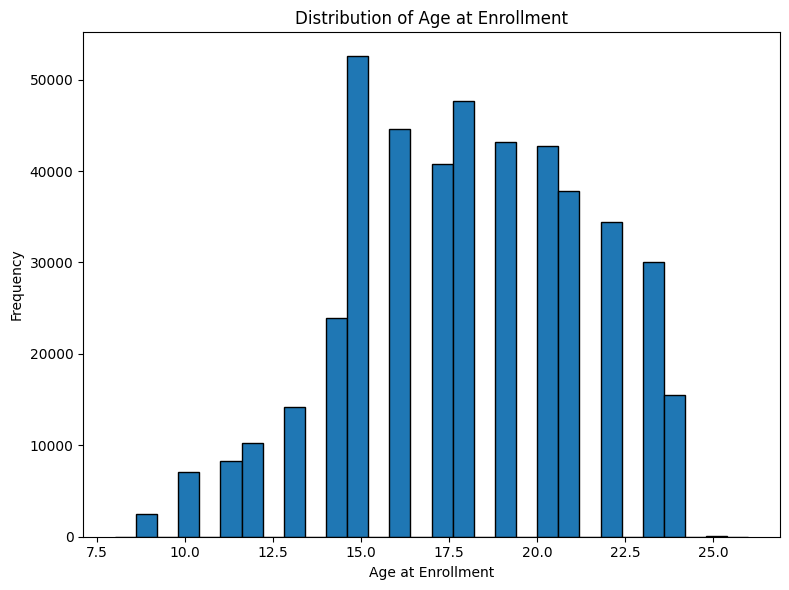

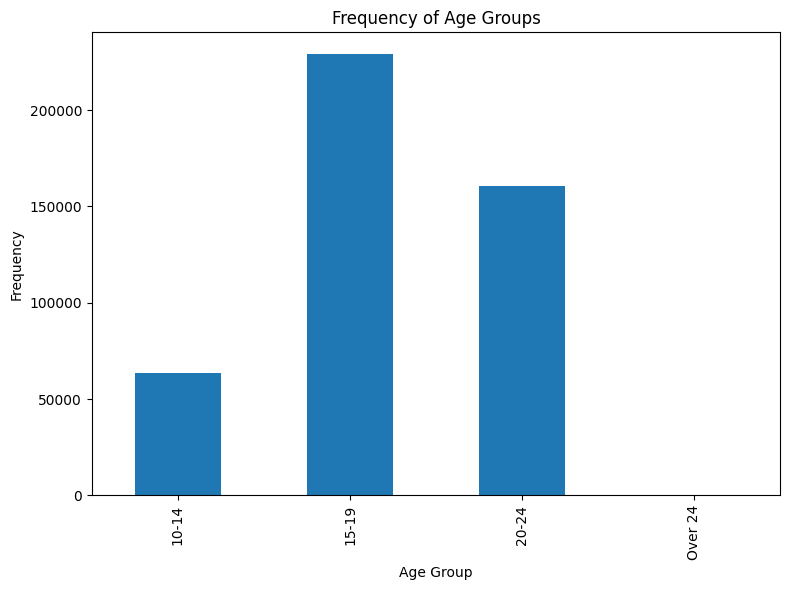

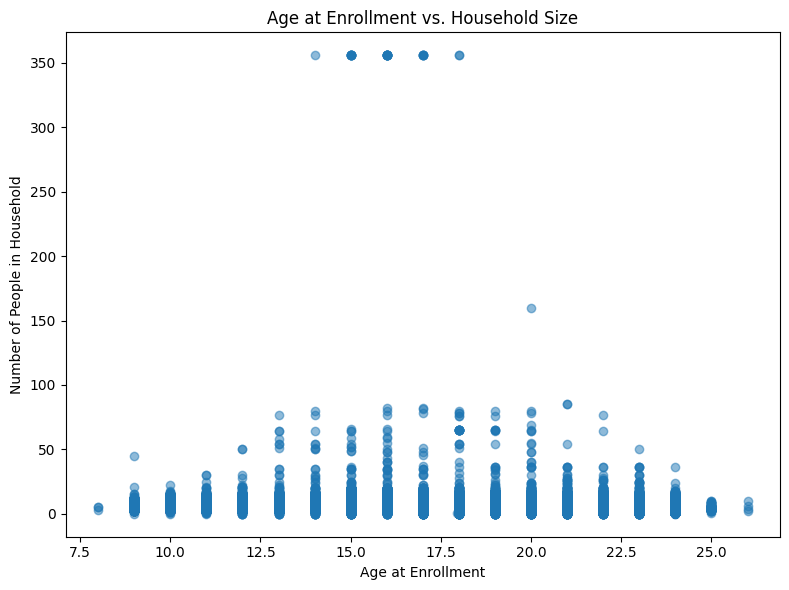

<Figure size 800x600 with 0 Axes>

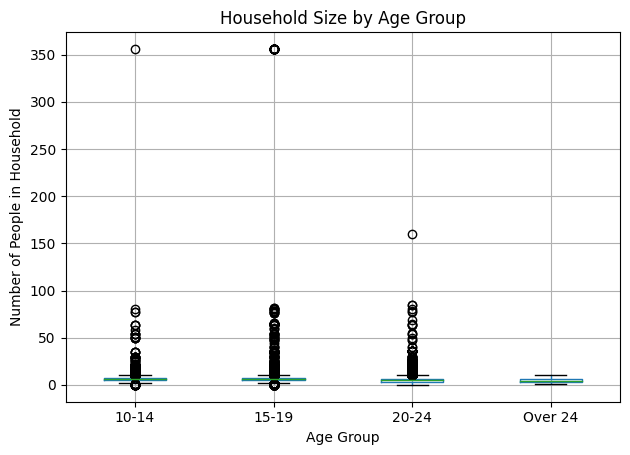

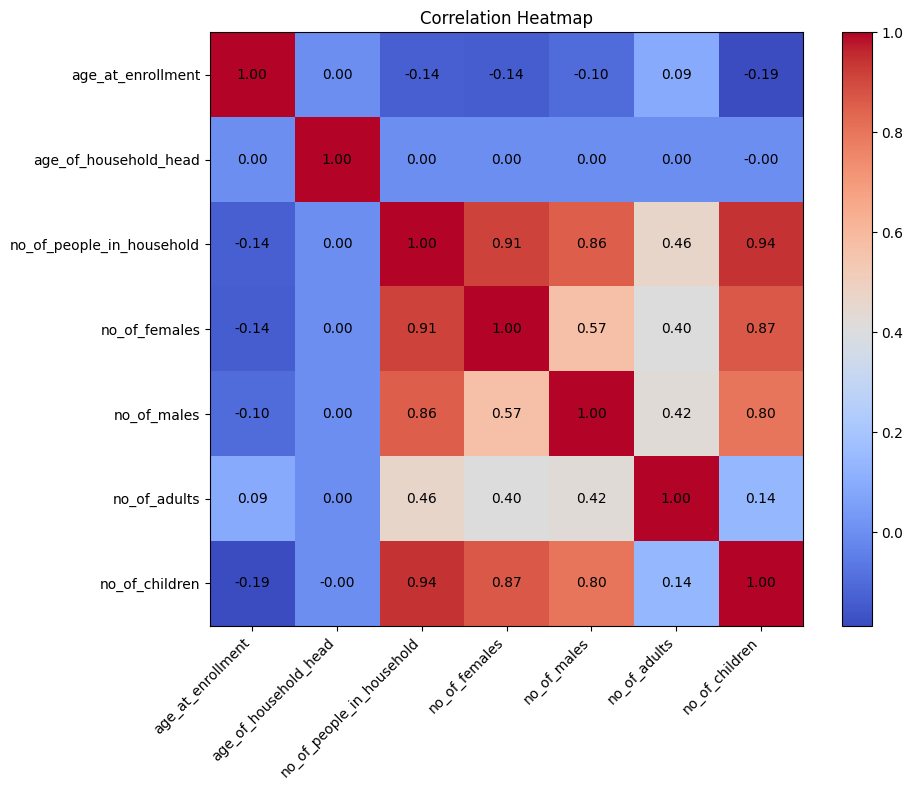

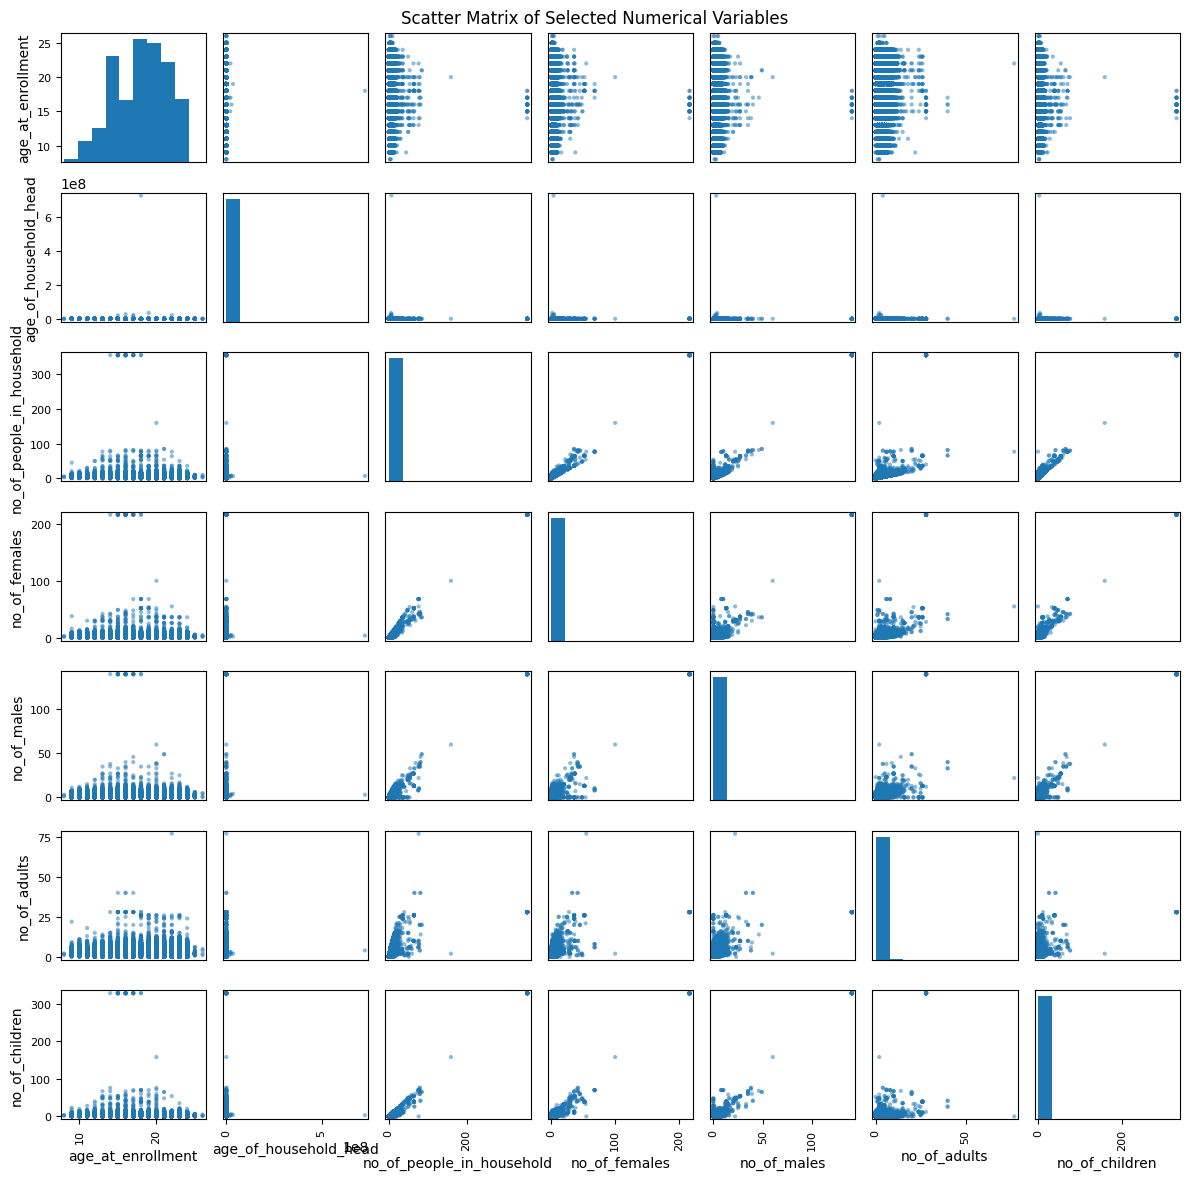

In [26]:
# =============================
# Univariate Analysis
# =============================

# 1. Numerical Summary Statistics
print("Summary Statistics (Numerical):")
print(data.describe())

# 2. Frequency counts for categorical variables
print("\nFrequency counts for 'age_group':")
print(data['age_group'].value_counts())

print("\nFrequency counts for 'year':")
print(data['year'].value_counts())

# 3. Histogram for 'age_at_enrollment'
plt.figure(figsize=(8, 6))
plt.hist(data['age_at_enrollment'], bins=30, edgecolor='black')
plt.xlabel("Age at Enrollment")
plt.ylabel("Frequency")
plt.title("Distribution of Age at Enrollment")
plt.tight_layout()
plt.show()

# 4. Bar Chart for Age Groups
plt.figure(figsize=(8, 6))
data['age_group'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Frequency of Age Groups")
plt.tight_layout()
plt.show()


# =============================
# Bivariate Analysis
# =============================

# 1. Scatter Plot: Age at Enrollment vs. Household Size
plt.figure(figsize=(8, 6))
plt.scatter(data['age_at_enrollment'], data['no_of_people_in_household'], alpha=0.5)
plt.xlabel("Age at Enrollment")
plt.ylabel("Number of People in Household")
plt.title("Age at Enrollment vs. Household Size")
plt.tight_layout()
plt.show()

# 2. Boxplot: Household Size by Age Group
plt.figure(figsize=(8, 6))
data.boxplot(column='no_of_people_in_household', by='age_group')
plt.xlabel("Age Group")
plt.ylabel("Number of People in Household")
plt.title("Household Size by Age Group")
plt.suptitle("")  # Removes the automatic 'Boxplot grouped by age_group' title
plt.tight_layout()
plt.show()


# =============================
# Multivariate Analysis
# =============================

# 1. Correlation Heatmap for Selected Numerical Variables
num_vars = ['age_at_enrollment', 'age_of_household_head', 'no_of_people_in_household', 
            'no_of_females', 'no_of_males', 'no_of_adults', 'no_of_children']

corr_matrix = data[num_vars].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(num_vars)), num_vars, rotation=45, ha="right")
plt.yticks(range(len(num_vars)), num_vars)
plt.title("Correlation Heatmap")
# Annotate the correlation coefficients on the heatmap
for i in range(len(num_vars)):
    for j in range(len(num_vars)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")
plt.tight_layout()
plt.show()

# 2. Scatter Matrix (Pair Plot) for Selected Numerical Variables
pd.plotting.scatter_matrix(data[num_vars], figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Matrix of Selected Numerical Variables")
plt.tight_layout()
plt.show()
